<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

**Litecoin Price History**

This tutorial, we're going to pull Litecoin cryptocurrency prices from a public API and download them as Excel files. I need to import two libraries first: *requests*  (to pull data from the web) and *pandas* to process it. May require `pip install requests`

In [1]:
import requests
import pandas as pd

I have a predefined function that simplifies the process of importing data from Cryptowatch (for reference, check their docs).

In [2]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

I will now pull data from Litecoin, the one of the most popular cryptocurrencies, for the last 100 days:

In [3]:
last_100days = (pd.Timestamp.now() - pd.offsets.Day(100))
last_100days

Timestamp('2021-11-17 14:32:26.348207')

In [4]:
ltc = get_historic_price('ltc', 'bitstamp', after=last_100days)
ltc.tail()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-02-25 11:00:00,104.00,104.06,102.97,103.24,60.985051,6310.734106
2022-02-25 12:00:00,102.90,104.90,102.77,104.76,464.859016,48320.635680
2022-02-25 13:00:00,104.72,106.06,104.34,105.92,639.287801,67300.435644
2022-02-25 14:00:00,106.16,107.05,105.84,106.22,1070.768960,113881.710686
2022-02-25 15:00:00,105.88,106.14,105.38,105.42,559.251871,59161.848546


Let's plot it:

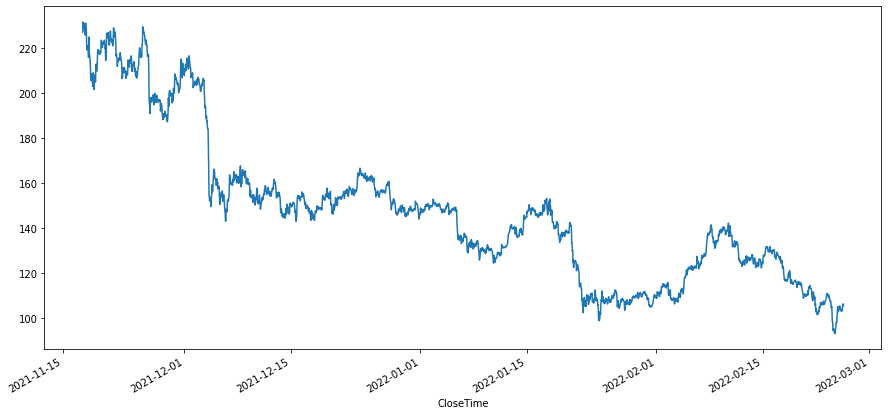

In [5]:
ltc['ClosePrice'].plot(figsize=(15, 7))

**Dynamic plots with Bokeh**

May need to `pip install bokeh`

In [6]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()

p1 = figure(x_axis_type="datetime", title="Crypto Prices")
p1.plot_height=400
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price $'
p1.line(ltc.index, ltc['ClosePrice'], color='#f2a900', legend_label='Litecoin')
p1.legend.location = "top_left"

show(p1)

**Exporting to Excel**

In [7]:
writer = pd.ExcelWriter('Litecoin_history.xlsx')
ltc.to_excel(writer, sheet_name='Litecoin')
writer.save()